In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train (1).csv')

In [3]:
joint=train

In [4]:
col_need=[]
for col in joint.columns:
    if joint[col].count()>int(0.7*len(joint)):
        col_need.append(col)

In [5]:
joint=joint[col_need]

In [6]:
col_un=['asset_niceroof','med_vacc_newborns','med_child_check',
        'wage_expenditures','ent_wagelabor',
        'fs_enoughtom','labor_primary',
        'early_survey','day_of_week']

joint.drop(col_un,axis=1,inplace=True)

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
from sklearn.preprocessing import Binarizer

In [8]:
transformer = Binarizer(threshold=1.5).fit(joint['ent_employees'].values.reshape(-1,1)) # fit does nothing.
joint['ent_employees_x']=transformer.transform(joint['ent_employees'].values.reshape(-1,1))

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
transformer = Binarizer(threshold=5).fit(joint['children'].values.reshape(-1,1)) # fit does nothing.
joint['children_bins']=transformer.transform(joint['children'].values.reshape(-1,1))
joint['children_bins'].value_counts()

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1041
1     102
Name: children_bins, dtype: int64

In [10]:
joint['fs_sleephun'].fillna(0,inplace=True)
joint['age'].fillna(joint['age'].mean(),inplace=True)
joint.fillna(0,inplace=True)

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\ADEBAYO\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [11]:
joint=joint.drop(['depressed','village','surveyid','survey_date'],axis=1)

In [12]:
import sklearn.feature_selection as fs

print(joint.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
features_reduced = sel.fit_transform(joint)

## Print the support and shape for the transformed features
print('Reduced shape:')
print(features_reduced.shape)

(1143, 49)
Reduced shape:
(1143, 40)


In [13]:
print(joint.columns[sel.get_support()])

Index(['age', 'married', 'children', 'hhsize', 'edu', 'hh_children',
       'hh_totalmembers', 'cons_nondurable', 'asset_livestock',
       'asset_durable', 'asset_phone', 'asset_savings',
       'asset_land_owned_total', 'cons_allfood', 'cons_ownfood',
       'cons_alcohol', 'cons_tobacco', 'cons_med_total', 'cons_ed',
       'cons_social', 'cons_other', 'ent_ownfarm', 'ent_nonagbusiness',
       'ent_nonag_revenue', 'ent_nonag_flowcost', 'ent_farmrevenue',
       'ent_farmexpenses', 'ent_animalstockrev', 'ent_total_cost',
       'fs_adskipm_often', 'fs_adwholed_often', 'fs_meat', 'fs_sleephun',
       'med_sickdays_hhave', 'durable_investment', 'nondurable_investment',
       'amount_given_mpesa', 'amount_received_mpesa', 'net_mpesa',
       'amount_saved_mpesa'],
      dtype='object')


In [14]:
print(features_reduced.shape)

# Create correlation matrix
corr_matrix = pd.DataFrame(features_reduced,columns=joint.columns[sel.get_support()]).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

feature_mat=pd.DataFrame(features_reduced,columns=joint.columns[sel.get_support()]).drop(to_drop,axis=1)

print(to_drop)
print(feature_mat.shape)

(1143, 40)
['hhsize', 'hh_totalmembers', 'cons_allfood', 'ent_total_cost', 'net_mpesa']
(1143, 35)


Applying PCA to reduce dimensionality. Note that the features have to be scaled first.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
scaler.fit_transform(feature_mat)

array([[-0.47591917,  0.54263315,  0.61749574, ..., -0.08532784,
        -0.14292614, -0.11537196],
       [-0.83992367,  0.54263315,  0.0758245 , ..., -0.08532784,
         0.04972078, -0.11537196],
       [-0.91272457,  0.54263315,  0.0758245 , ..., -0.08532784,
         0.17815203, -0.11537196],
       ...,
       [-0.47591917,  0.54263315,  1.15916698, ..., -0.08532784,
        -0.14292614, -0.11537196],
       [-0.11191467, -1.84286566,  0.61749574, ..., -0.08532784,
        -0.14292614, -0.11537196],
       [ 0.32489074,  0.54263315, -1.54918924, ..., -0.08532784,
        -0.14292614, -0.11537196]])

In [17]:
from sklearn.decomposition import PCA

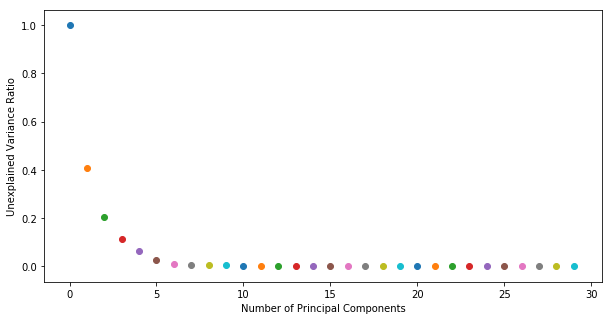

In [18]:
pca=PCA(30).fit(feature_mat)
plt.figure(figsize=(10,5))
for i in range(0,len(pca.explained_variance_ratio_)):
    plt.scatter(y=pca.explained_variance_ratio_[i:].sum(),x=i)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Unexplained Variance Ratio')

In [19]:
join=PCA(5).fit_transform(feature_mat)
join.shape

(1143, 5)

In [20]:
X=feature_mat[:]
Y=train['depressed'].ravel()


split_test_size=.4

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y, test_size=split_test_size, random_state=50)

Using SMOTE to balanced out the dataset

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE(random_state=12,sampling_strategy=.5)
Xtrain, Ytrain = sm.fit_sample(Xtrain, Ytrain)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler().fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [25]:
from catboost import CatBoostClassifier

In [26]:
cb=CatBoostClassifier(iterations=1000,depth=4,eval_metric='Accuracy',
                    random_seed=10,learning_rate=.05).fit(Xtrain,Ytrain,eval_set=(Xtest,Ytest),verbose=50,
                                                          early_stopping_rounds=100,use_best_model=True)

0:	learn: 0.7010551	test: 0.8209607	best: 0.8209607 (0)	total: 190ms	remaining: 3m 9s
50:	learn: 0.8182884	test: 0.8275109	best: 0.8318777 (22)	total: 4.57s	remaining: 1m 25s
100:	learn: 0.8581477	test: 0.8318777	best: 0.8340611 (57)	total: 8.8s	remaining: 1m 18s
150:	learn: 0.8722157	test: 0.8384279	best: 0.8384279 (143)	total: 13.4s	remaining: 1m 15s
200:	learn: 0.8874560	test: 0.8362445	best: 0.8384279 (143)	total: 18s	remaining: 1m 11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8384279476
bestIteration = 143

Shrink model to first 144 iterations.


In [27]:
print('Base accuracy for training set is:', 1-Ytrain.mean())
print('Base accuracy for validation set is:',1 - Ytest.mean())

Base accuracy for training set is: 0.6670574443141852
Base accuracy for validation set is: 0.8318777292576419


In [28]:
from sklearn.metrics import confusion_matrix,balanced_accuracy_score

In [29]:
cb.score(Xtest,Ytest)

0.8384279475982532

In [30]:
confusion_matrix(Ytest,cb.predict(Xtest))

array([[380,   1],
       [ 73,   4]], dtype=int64)

In [31]:
print(balanced_accuracy_score(Ytest,cb.predict(Xtest)))

0.5246616900160207


Classifier is better than random guessing but not by too much. The data is not only imbalanced, it is very noisy too. Furthermore, accuracy isnt the best metric to optimize for in problems like this. In real life, we might want to be biased a little towards the minority set as this usually our focus.